# Pruebas Adaboost + RandomForest

El set de training usado se genera desde `lucho/generar_set_test`

Cambios respecto a submit-45:
 - RandomForest en lugar de DecisionTrees

In [10]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
RANDOM_SEED = 12

In [3]:
entrenamiento = pd.read_csv('/home/luciano/orga-datos/training-set-final.csv')

In [4]:
no_postulaciones = entrenamiento[entrenamiento['sepostulo'] == 0].sample(500000, random_state=RANDOM_SEED)
postulaciones    = entrenamiento[entrenamiento['sepostulo'] == 1]

entrenamiento = pd.concat([postulaciones, no_postulaciones]).sample(frac=1)

In [5]:
kaggle_set = pd.read_csv('/home/luciano/orga-datos/test_final_100k-preprocesado.csv')

In [6]:
TEST_SIZE_PERCENT = 0.1

In [7]:
X = entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante', 'sepostulo'])
y = entrenamiento['sepostulo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

In [8]:
X_kaggle = kaggle_set.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])

In [11]:
clasificador = AdaBoostClassifier(
    base_estimator = RandomForestClassifier(n_estimators=40, min_samples_split=100, n_jobs=-1, verbose=1),
    n_estimators=50,
    random_state=RANDOM_SEED
)

In [13]:
clasificador.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   59.6s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.9s finished
[Parallel(n_j

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=12)

In [14]:
y_test_predictd = clasificador.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]

In [15]:
roc_auc_score(y_test, y_test_predictd)

0.99217015228631

In [16]:
clasificador.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]

0.96688

In [17]:
y_kaggle = clasificador.predict_proba(X_kaggle)[:, 1]

[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]

In [18]:
kaggle_out = kaggle_set[['id']].copy()
kaggle_out['sepostulo'] = y_kaggle

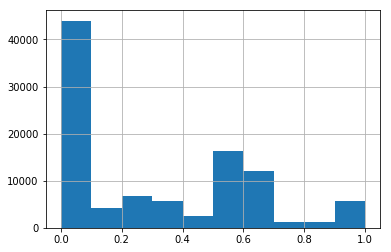

In [19]:
kaggle_out['sepostulo'].hist()

In [20]:
kaggle_out.to_csv('/home/luciano/orga-datos/tmp/submits/submit-57.csv', index=False)

In [21]:
kaggle_45 = pd.read_csv('/home/luciano/orga-datos/tmp/submits/submit-45.csv')

In [22]:
print('ROCAUC 45 vs 57:', roc_auc_score(np.round(kaggle_45['sepostulo']), kaggle_out['sepostulo']))

ROCAUC 45 vs 57: 0.9943520940322643


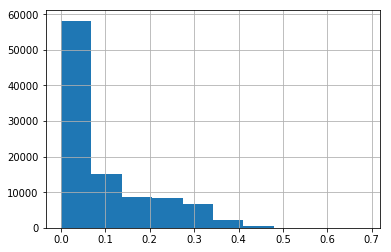

In [24]:
np.abs(kaggle_45['sepostulo'] - kaggle_out['sepostulo']).hist()

In [ ]:
# kaggle score: 0.85